In [4]:
import os
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/cmmju_15min_filled_extra.csv.tar.gz')
print(zip_path)
df = pd.read_csv(zip_path, compression='tar')

33065221/33065221 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
/root/.keras/datasets/cmmju_15min_filled_extra.csv.tar.gz


In [5]:
df.head(3)

,datetime,ambient_temp,current_power,value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,module_temp,total_irradiation,cc,...,tp,u10,v10,equation_of_time_min,zenith_deg,elevation_deg,azimuth_deg,declination_deg,hour_angle_deg,incidence_deg
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,0.0,9238.933333,37280.422222,58.022222,798.444444,0.000002,...,0.0,0.0,0.0,16.244239,36.998137,53.001863,158.619243,-15.751553,-13.176451,36.998137
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,0.0,9397.756098,39132.406593,58.263736,812.571429,0.000002,...,0.0,0.0,0.0,16.243603,35.874705,54.125295,164.395912,-15.754719,-9.426610,35.874705
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,0.0,14387.595506,32669.393258,57.235955,807.224719,0.000001,...,0.0,0.0,0.0,16.242965,35.105017,54.894983,170.471336,-15.757885,-5.676769,35.105017


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient_temp,138238.0,2.583504e+01,5.150631e+00,0.000000e+00,2.310989e+01,2.600000e+01,2.913483e+01,4.001099e+01
current_power,138238.0,1.305281e+04,1.815287e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.526932e+04,7.825989e+04
value_of_consumption,138238.0,1.175896e+04,1.289041e+04,0.000000e+00,6.292220e+03,7.790966e+03,1.153213e+04,1.452448e+05
external_energy_supply,138238.0,6.303765e+03,7.008863e+03,0.000000e+00,0.000000e+00,6.743865e+03,8.341677e+03,1.452448e+05
grid_feed_in,138238.0,8.960647e+03,1.839218e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.828382e+03,1.511431e+05
internal_power_supply,138238.0,5.468012e+03,1.032596e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.489396e+03,7.489512e+04
module_temp,138238.0,2.972648e+01,1.188849e+01,0.000000e+00,2.200000e+01,2.506593e+01,3.835227e+01,6.137363e+01
total_irradiation,138238.0,1.558014e+02,2.449202e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.658961e+02,1.183055e+03
cc,138238.0,4.359805e-02,1.265628e-01,-1.101628e-01,0.000000e+00,3.220249e-09,2.337181e-02,1.119586e+00
q,138238.0,1.159542e-02,3.011186e-03,9.365255e-04,9.185365e-03,1.241066e-02,1.412243e-02,1.746720e-02


In [7]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

incidence_deg: 69011 missing values


In [8]:
df.pop('value_of_consumption')
df.pop('external_energy_supply')
df.pop('grid_feed_in')
df.pop('internal_power_supply')
df.head(2)

,datetime,ambient_temp,current_power,module_temp,total_irradiation,cc,q,r,t,u,...,tp,u10,v10,equation_of_time_min,zenith_deg,elevation_deg,azimuth_deg,declination_deg,hour_angle_deg,incidence_deg
0,2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,0.000002,0.011270,64.187104,293.434588,0.544700,...,0.0,0.0,0.0,16.244239,36.998137,53.001863,158.619243,-15.751553,-13.176451,36.998137
1,2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,0.000002,0.011312,64.567093,293.392390,0.529152,...,0.0,0.0,0.0,16.243603,35.874705,54.125295,164.395912,-15.754719,-9.426610,35.874705


In [9]:
# Check what years exist in your dataset
date_col = 'datetime'  # Replace with your actual column name

df = df.sort_values(date_col).reset_index(drop=True)

# fill the NaN value with zero
df = df.fillna(0)

# Ensure timestamp column is datetime type
if df[date_col].dtype != 'datetime64[ns]':
    df[date_col] = pd.to_datetime(df[date_col])

# Sort by time if it exists
df.index = df[date_col]
df.pop(date_col)
df = df.sort_index()
print(df.shape)

df.head(5)

(138238, 29)


,ambient_temp,current_power,module_temp,total_irradiation,cc,q,r,t,u,v,...,tp,u10,v10,equation_of_time_min,zenith_deg,elevation_deg,azimuth_deg,declination_deg,hour_angle_deg,incidence_deg
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,2.297362e-06,0.011270,64.187104,293.434588,0.544700,-1.063590,...,0.0,0.0,0.0,16.244239,36.998137,53.001863,158.619243,-15.751553,-13.176451,36.998137
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,2.376975e-06,0.011312,64.567093,293.392390,0.529152,-0.912537,...,0.0,0.0,0.0,16.243603,35.874705,54.125295,164.395912,-15.754719,-9.426610,35.874705
2021-11-06 11:45:00,30.629213,47056.988764,57.235955,807.224719,1.268101e-06,0.011341,64.877710,293.356146,0.512290,-0.752512,...,0.0,0.0,0.0,16.242965,35.105017,54.894983,170.471336,-15.757885,-5.676769,35.105017
2021-11-06 12:00:00,31.021978,48415.835165,56.846154,817.527473,0.000000e+00,0.011366,65.189689,293.320821,0.497185,-0.620988,...,0.0,0.0,0.0,16.242326,34.712629,55.287371,176.742301,-15.761050,-1.926929,34.712629
2021-11-06 12:15:00,31.831461,49345.404494,55.842697,816.651685,-6.155763e-07,0.011393,65.556480,293.282514,0.484595,-0.543996,...,0.0,0.0,0.0,16.241685,34.710348,55.289652,183.081860,-15.764215,1.822911,34.710348


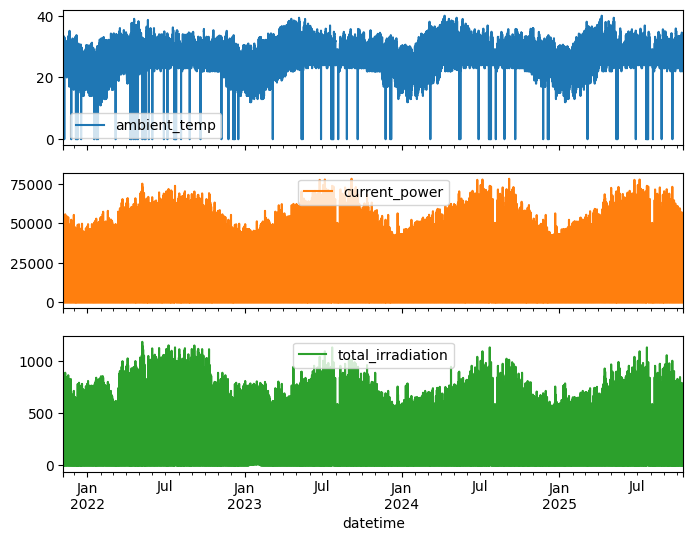

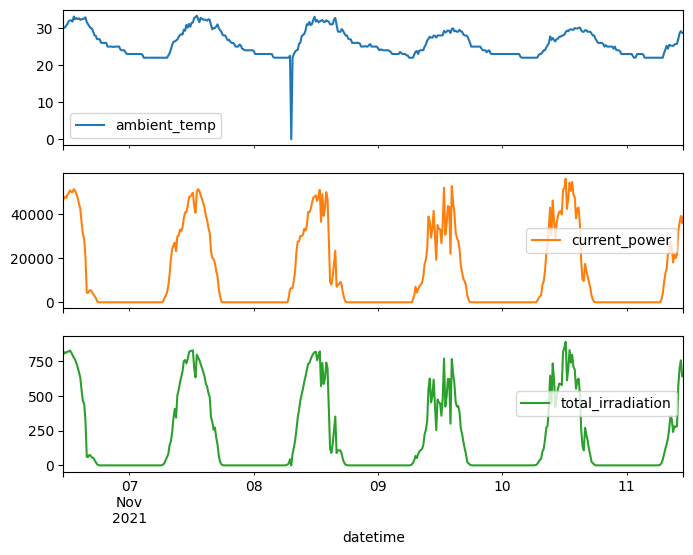

In [10]:
plot_cols = ['ambient_temp', 'current_power', 'total_irradiation']

plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient_temp,138238.0,2.583504e+01,5.150631e+00,0.000000e+00,2.310989e+01,2.600000e+01,2.913483e+01,4.001099e+01
current_power,138238.0,1.305281e+04,1.815287e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.526932e+04,7.825989e+04
module_temp,138238.0,2.972648e+01,1.188849e+01,0.000000e+00,2.200000e+01,2.506593e+01,3.835227e+01,6.137363e+01
total_irradiation,138238.0,1.558014e+02,2.449202e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.658961e+02,1.183055e+03
cc,138238.0,4.359805e-02,1.265628e-01,-1.101628e-01,0.000000e+00,3.220249e-09,2.337181e-02,1.119586e+00
q,138238.0,1.159542e-02,3.011186e-03,9.365255e-04,9.185365e-03,1.241066e-02,1.412243e-02,1.746720e-02
r,138238.0,7.132175e+01,1.883879e+01,5.090677e+00,5.958766e+01,7.651043e+01,8.575714e+01,1.021718e+02
t,138238.0,2.923224e+02,2.716761e+00,2.807780e+02,2.909737e+02,2.922867e+02,2.937349e+02,3.033400e+02
u,138238.0,1.576004e+00,3.782749e+00,-1.205189e+01,-1.113140e+00,1.582850e+00,4.063873e+00,1.637189e+01
v,138238.0,1.610226e+00,2.717374e+00,-1.103489e+01,-1.094490e-01,1.552305e+00,3.272746e+00,1.351355e+01


In [14]:
print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021, 2022, 2023, 2024, 2025], dtype='int32', name='datetime')
datetime
2024    35136
2023    35040
2022    35040
2025    27691
2021     5331
Name: count, dtype: int64


In [15]:
df.shape

(138238, 29)

In [16]:
df_proced = df.copy()
df_proced = df_proced.ffill() # forward fill to impute missing values
df_proced.head(3)

,ambient_temp,current_power,module_temp,total_irradiation,cc,q,r,t,u,v,...,tp,u10,v10,equation_of_time_min,zenith_deg,elevation_deg,azimuth_deg,declination_deg,hour_angle_deg,incidence_deg
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-06 11:15:00,30.288889,46519.355556,58.022222,798.444444,0.000002,0.011270,64.187104,293.434588,0.544700,-1.063590,...,0.0,0.0,0.0,16.244239,36.998137,53.001863,158.619243,-15.751553,-13.176451,36.998137
2021-11-06 11:30:00,30.076923,47600.714286,58.263736,812.571429,0.000002,0.011312,64.567093,293.392390,0.529152,-0.912537,...,0.0,0.0,0.0,16.243603,35.874705,54.125295,164.395912,-15.754719,-9.426610,35.874705
2021-11-06 11:45:00,30.629213,47056.988764,57.235955,807.224719,0.000001,0.011341,64.877710,293.356146,0.512290,-0.752512,...,0.0,0.0,0.0,16.242965,35.105017,54.894983,170.471336,-15.757885,-5.676769,35.105017


In [17]:
mean = df_proced.mean()
std = df_proced.std()

df_proced = (df_proced - mean) / std

# Shift to non-negative values using Min-Max scaling
min_val = df_proced.min()
max_val = df_proced.max()
df_proced = (df_proced - min_val) / (max_val - min_val)

[Text(0, 0, 'ambient_temp'),
 Text(1, 0, 'current_power'),
 Text(2, 0, 'module_temp'),
 Text(3, 0, 'total_irradiation'),
 Text(4, 0, 'cc'),
 Text(5, 0, 'q'),
 Text(6, 0, 'r'),
 Text(7, 0, 't'),
 Text(8, 0, 'u'),
 Text(9, 0, 'v'),
 Text(10, 0, 'fal'),
 Text(11, 0, 'slhf'),
 Text(12, 0, 'sp'),
 Text(13, 0, 'sshf'),
 Text(14, 0, 'ssr'),
 Text(15, 0, 'ssrd'),
 Text(16, 0, 'str'),
 Text(17, 0, 'strd'),
 Text(18, 0, 't2m'),
 Text(19, 0, 'tp'),
 Text(20, 0, 'u10'),
 Text(21, 0, 'v10'),
 Text(22, 0, 'equation_of_time_min'),
 Text(23, 0, 'zenith_deg'),
 Text(24, 0, 'elevation_deg'),
 Text(25, 0, 'azimuth_deg'),
 Text(26, 0, 'declination_deg'),
 Text(27, 0, 'hour_angle_deg'),
 Text(28, 0, 'incidence_deg')]

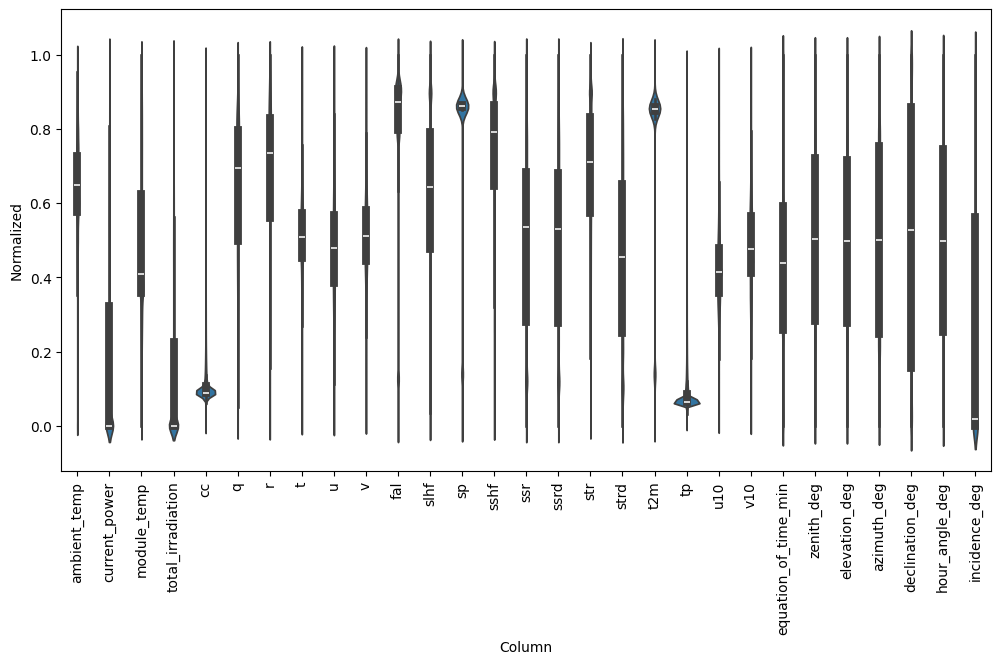

In [18]:
#df_std = (df - train_mean) / train_std
df_std = df_proced.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticks(range(len(df_proced.keys())))
ax.set_xticklabels(df_proced.keys(), rotation=90)

Text(0, 0.5, 'total_irradiation')

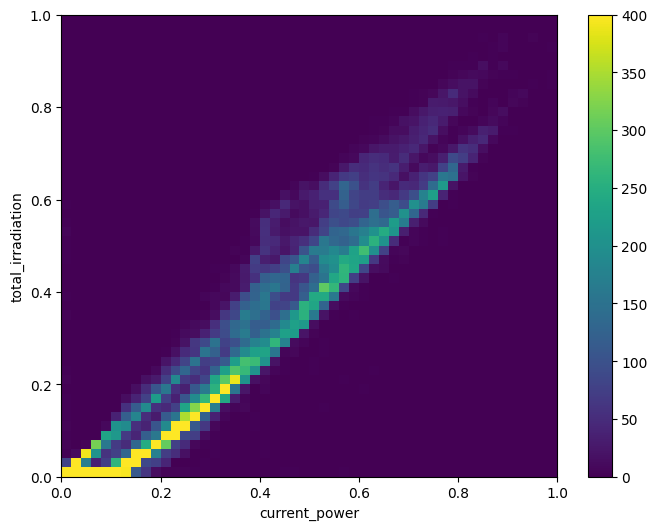

In [19]:
plt.hist2d(df_proced['current_power'], df_proced['total_irradiation'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('current_power')
plt.ylabel('total_irradiation')

Text(0, 0.5, 'elevation_deg')

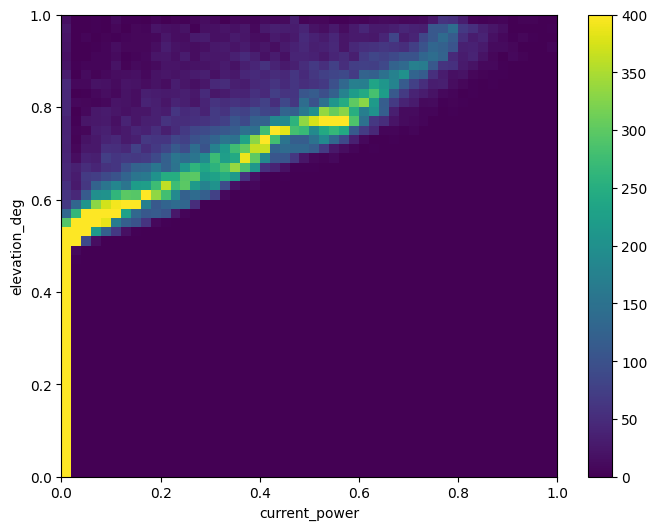

In [20]:
plt.hist2d(df_proced['current_power'], df_proced['elevation_deg'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('current_power')
plt.ylabel('elevation_deg')

Text(0, 0.5, 'v')

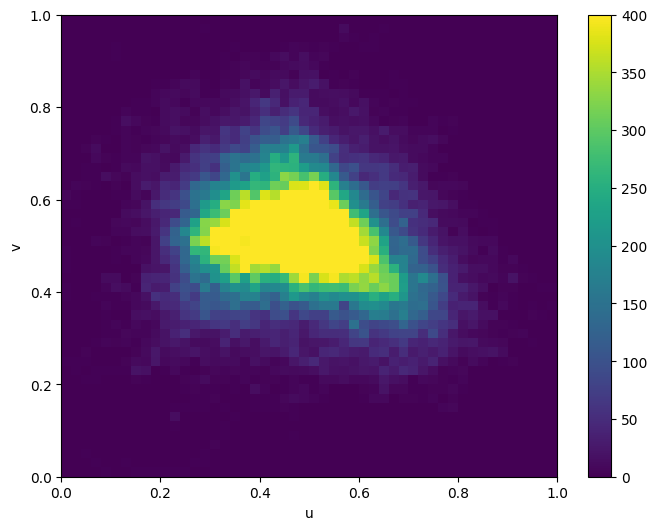

In [21]:
plt.hist2d(df_proced['u'], df_proced['v'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('u')
plt.ylabel('v')

In [22]:
print(df_proced.index.min())
print(df_proced.index.max())

2021-11-06 11:15:00
2025-10-16 10:30:00


In [23]:
column_indices = {name: i for i, name in enumerate(df_proced.columns)}

n = len(df_proced)
test_df = df_proced[0:int(n*0.2)]
train_df = df_proced[int(n*0.2):int(n*0.8)]
val_df = df_proced[int(n*0.8):]

num_features = df_proced.shape[1]

print(f'Training set: {train_df.shape}')
print(f'Validation set: {val_df.shape}')
print(f'Test set: {test_df.shape}')

Training set: (82943, 29)
Validation set: (27648, 29)
Test set: (27647, 29)


In [24]:
print(f'Column indices: {column_indices}')
print(f"num_features: {num_features}")

Column indices: {'ambient_temp': 0, 'current_power': 1, 'module_temp': 2, 'total_irradiation': 3, 'cc': 4, 'q': 5, 'r': 6, 't': 7, 'u': 8, 'v': 9, 'fal': 10, 'slhf': 11, 'sp': 12, 'sshf': 13, 'ssr': 14, 'ssrd': 15, 'str': 16, 'strd': 17, 't2m': 18, 'tp': 19, 'u10': 20, 'v10': 21, 'equation_of_time_min': 22, 'zenith_deg': 23, 'elevation_deg': 24, 'azimuth_deg': 25, 'declination_deg': 26, 'hour_angle_deg': 27, 'incidence_deg': 28}
num_features: 29


In [25]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='current_power', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      # plot input value
      plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      # plot label
      plt.plot(self.label_indices, labels[n, :, label_col_index], label='Labels', c='#2ca02c', marker='.', zorder=-9)

      if model is not None:
        predictions = model(inputs)
        plt.plot(self.label_indices, predictions[n, :, label_col_index], label='Predictions', c='#ff7f0e', marker='.', zorder=-8)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [15min]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [26]:
wide_window = WindowGenerator(
    input_width=128, label_width=128, shift=1,
    label_columns=['current_power'])

wide_window

Total window size: 129
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
Label indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 

In [27]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:wide_window.total_window_size]),
                           np.array(train_df[100:100+wide_window.total_window_size]),
                           np.array(train_df[200:200+wide_window.total_window_size])])

example_inputs, example_labels = wide_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 129, 29)
Inputs shape: (3, 128, 29)
Labels shape: (3, 128, 1)


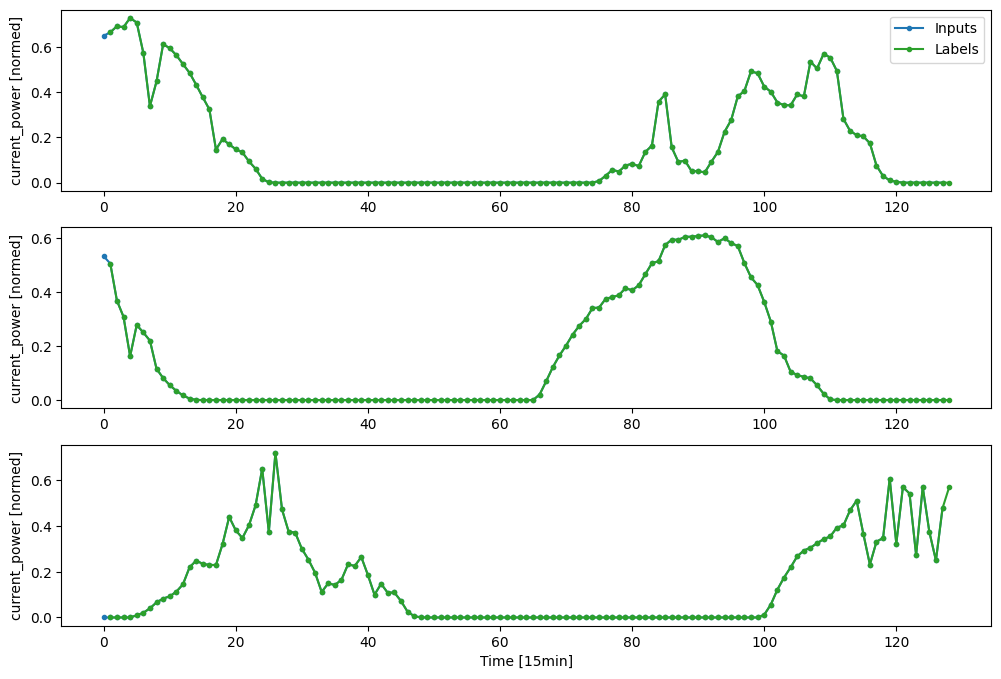

In [28]:
wide_window.plot()

In [29]:
# Each element is an (inputs, label) pair.
wide_window.train.element_spec

(TensorSpec(shape=(None, 128, 29), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 128, 1), dtype=tf.float32, name=None))

In [30]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 128, 29)
Labels shape (batch, time, features): (32, 128, 1)


In [31]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['current_power'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['current_power']

In [32]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 29)
Labels shape (batch, time, features): (32, 1, 1)


In [33]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0260
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0247


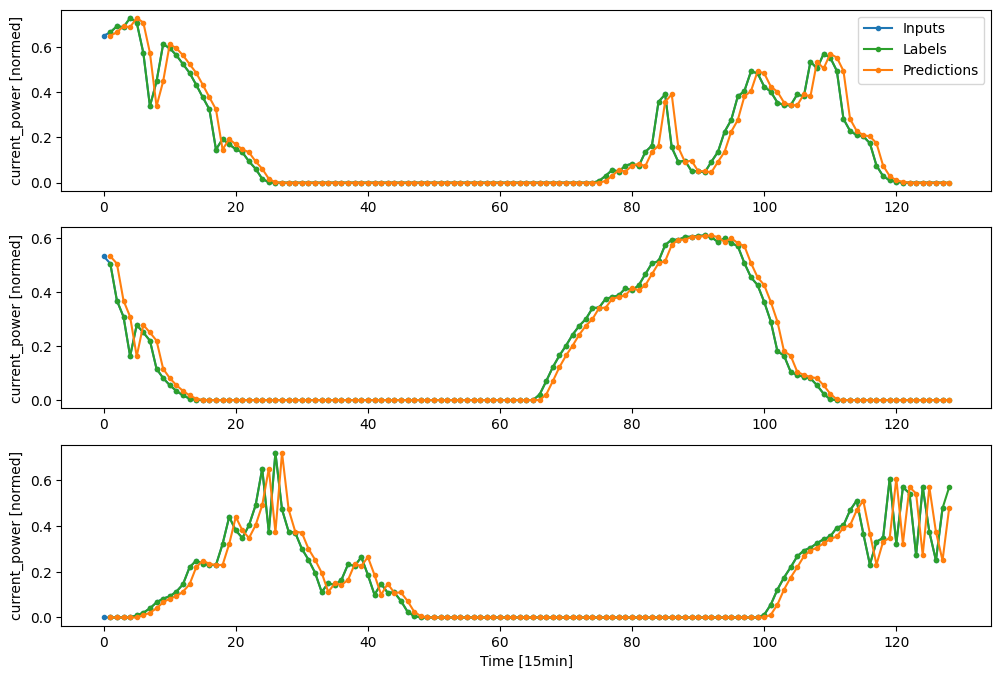

In [34]:
baseline = Baseline(label_index=column_indices['current_power'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['1-Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['1-Baseline'] = baseline.evaluate(single_step_window.test, return_dict=True)
wide_window.plot(baseline)

In [35]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 128, 29)
Output shape: (32, 128, 1)


In [39]:
MAX_EPOCHS = 50
LEARNING_RATE = 0.001

# models_dir = 'src/jupyter_nb/experiments/sin_cosine_models'
models_dir = 'sin_cosine_models'

def fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

def load_or_train_model(model_name, model, window, is_custom=False):
  """
  Load model if it exists, otherwise train and save it.

  Args:
      model_name: Name of the model (e.g., 'linear_model')
      model: The Keras model object
      window: Training window
      is_custom: True for custom Model subclasses (saves weights only)

  Returns:
      Trained model
  """
  # Add appropriate extension based on model type
  if is_custom:
    model_filename = f"{model_name}.weights.h5"
  else:
    model_filename = f"{model_name}.keras"

  model_path = os.path.join(models_dir, model_filename)

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Nadam(learning_rate=LEARNING_RATE),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  if os.path.exists(model_path):
    print(f"✓ Loading existing model: {model_name}")
    if is_custom:
      # For custom models, load weights only
      model.load_weights(model_path)
    else:
      # Use safe_mode=False to allow loading models with serializable layers
      model = tf.keras.models.load_model(model_path, safe_mode=False)
    return model
  else:
    print(f"→ Training model: {model_name}")
    history = fit(model, window)
    print(f"✓ Training complete: {model_name}")

    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
        print(f"Created directory: {models_dir}")

    if is_custom:
      # For custom models, save weights only
      model.save_weights(model_path)
    else:
      model.save(model_path)

    print(f"✓ Model saved to {model_path}")
    return model

→ Training model: linear_model
Epoch 1/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0282
Epoch 2/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0283
Epoch 3/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0281
Epoch 4/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0282
Epoch 5/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0284
✓ Training complete: linear_model
Created directory: sin_cosine_models
✓ Model saved to sin_cosine_models/linear_model.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0030 - mean_absolute_error: 

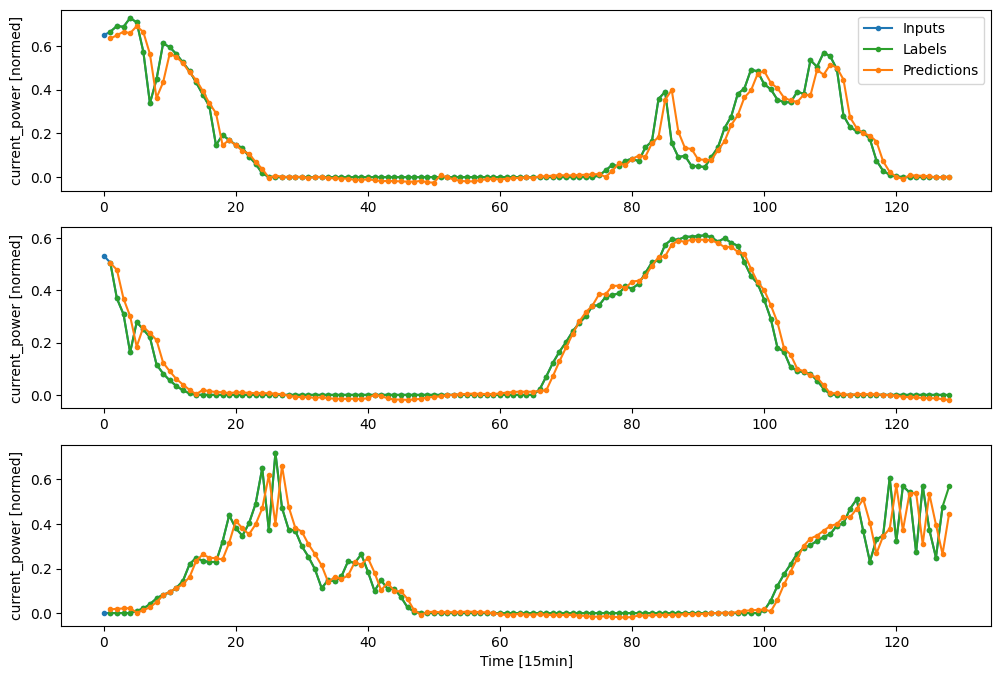

In [40]:
linear = load_or_train_model('linear_model', linear, wide_window)

val_performance['2-Linear'] = linear.evaluate(wide_window.val, return_dict=True)
performance['2-Linear'] = linear.evaluate(wide_window.test, return_dict=True)
wide_window.plot(linear)

In [41]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 128, 29)
Output shape: (32, 128, 1)


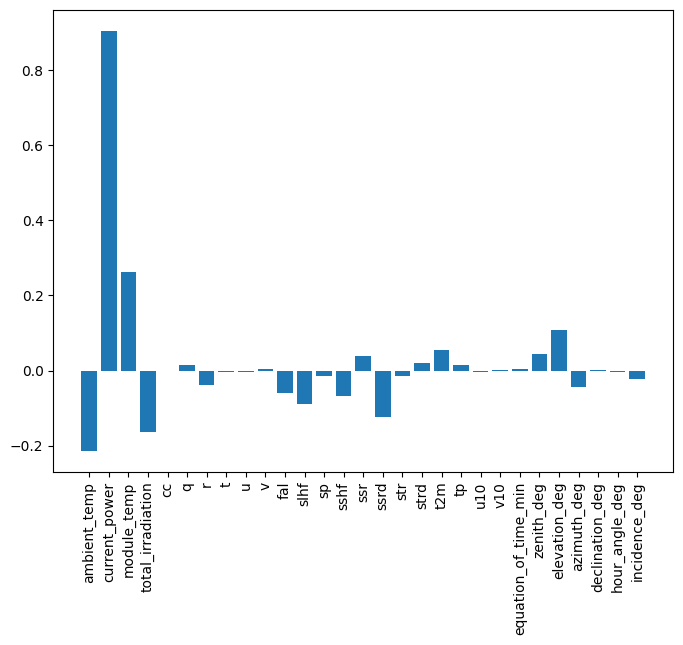

In [42]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

→ Training model: dense_model
Epoch 1/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0337 - val_loss: 0.0031 - val_mean_absolute_error: 0.0321
Epoch 2/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0229 - val_loss: 0.0027 - val_mean_absolute_error: 0.0238
Epoch 3/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0221 - val_loss: 0.0027 - val_mean_absolute_error: 0.0233
Epoch 4/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0215 - val_loss: 0.0027 - val_mean_absolute_error: 0.0236
Epoch 5/50
2588/2588 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0212 - val_loss: 0.0028 - val_mean_absolute_error: 0.0247
✓ Training complete: dense_model
✓ Model saved to sin_cosine_models/dense_model.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0246
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4

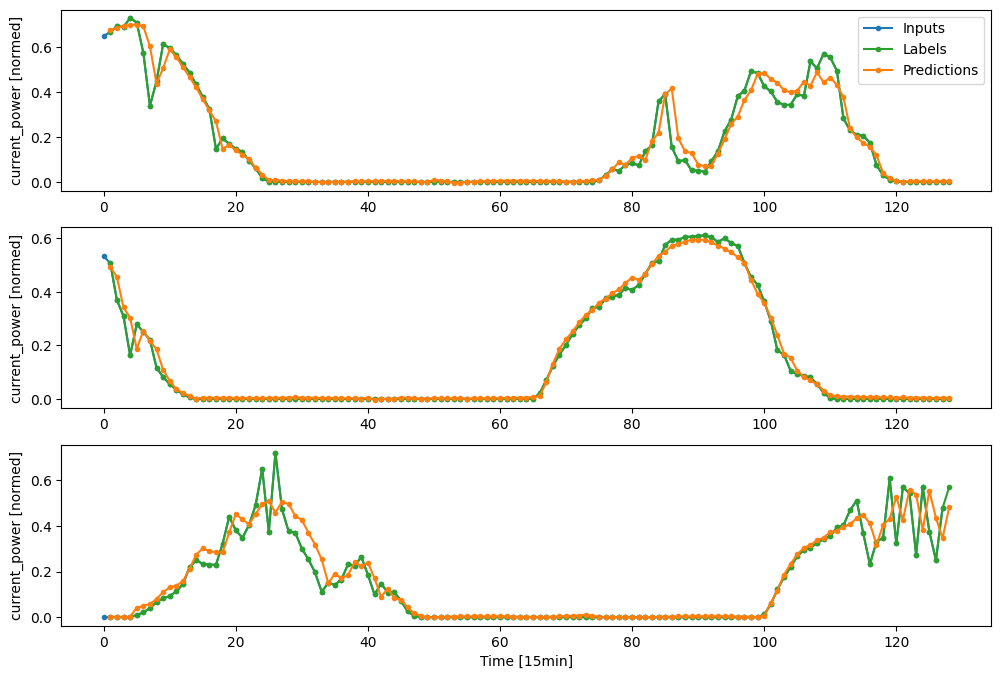

In [43]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

dense = load_or_train_model('dense_model', dense, wide_window)

val_performance['3-Dense'] = dense.evaluate(wide_window.val, return_dict=True)
performance['3-Dense'] = dense.evaluate(wide_window.test, return_dict=True)
wide_window.plot(dense)

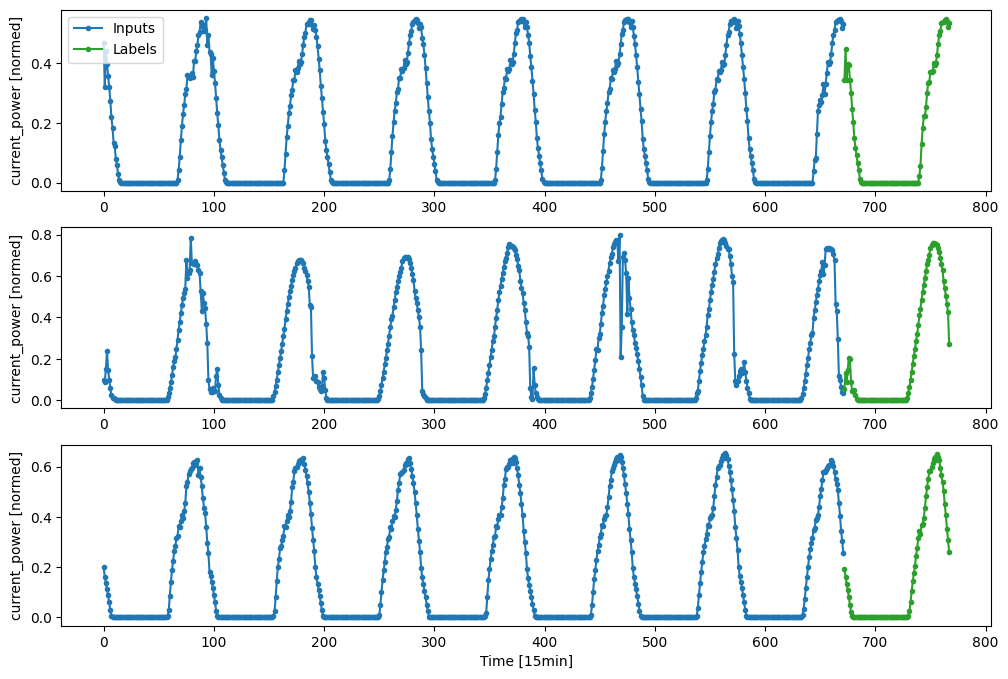

In [44]:
OUT_STEPS = 96
INPUT_STEPS = 672
multi_window = WindowGenerator(input_width=INPUT_STEPS,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['current_power'])

multi_window.plot()

841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2496 - mean_absolute_error: 0.4187
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2357 - mean_absolute_error: 0.4024


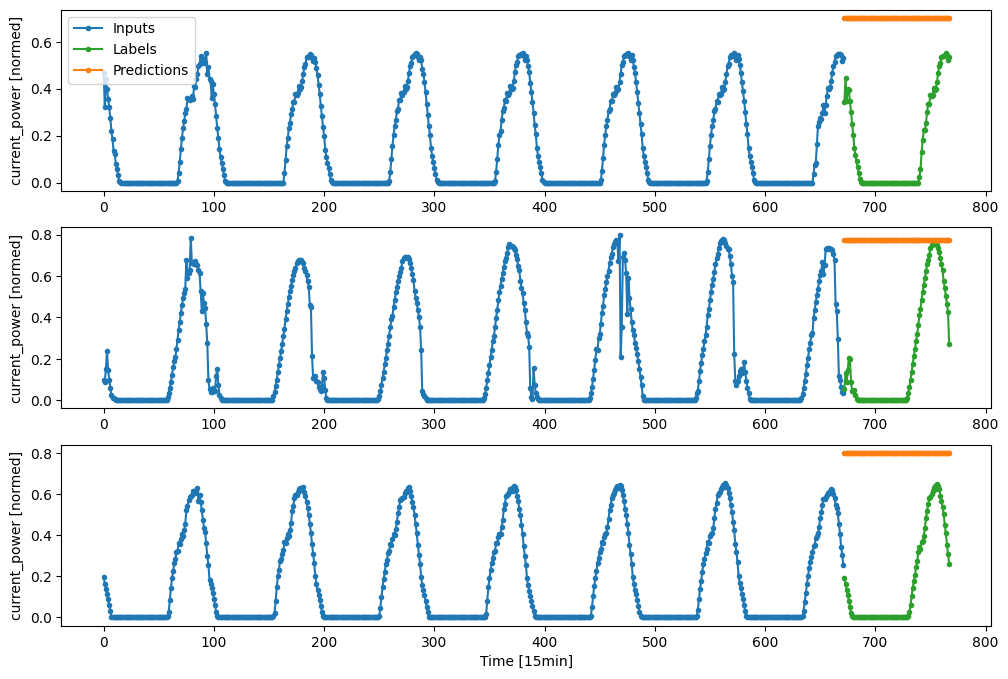

In [45]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])
v_performance = {}
t_performance = {}
v_performance['A-Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
t_performance['A-Last'] = last_baseline.evaluate(multi_window.test, return_dict=True)
multi_window.plot(last_baseline)

In [46]:
OUT_STEPS     = 96
INPUT_STEPS   = 672
CONV_WIDTH    = 3
NUM_FEATURES  = 29

multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(INPUT_STEPS, NUM_FEATURES)),
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=CONV_WIDTH, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(OUT_STEPS, kernel_initializer='glorot_uniform'),
    tf.keras.layers.Reshape([OUT_STEPS, 1]),
])

In [47]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:multi_window.total_window_size]),
                           np.array(train_df[100:100+multi_window.total_window_size]),
                           np.array(train_df[200:200+multi_window.total_window_size])])

example_inputs, example_labels = multi_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 768, 29)
Inputs shape: (3, 672, 29)
Labels shape: (3, 96, 1)


In [48]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_conv_model(multi_window.example[0]).shape)

Input shape: (32, 672, 29)
Output shape: (32, 96, 1)


841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0526
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0524


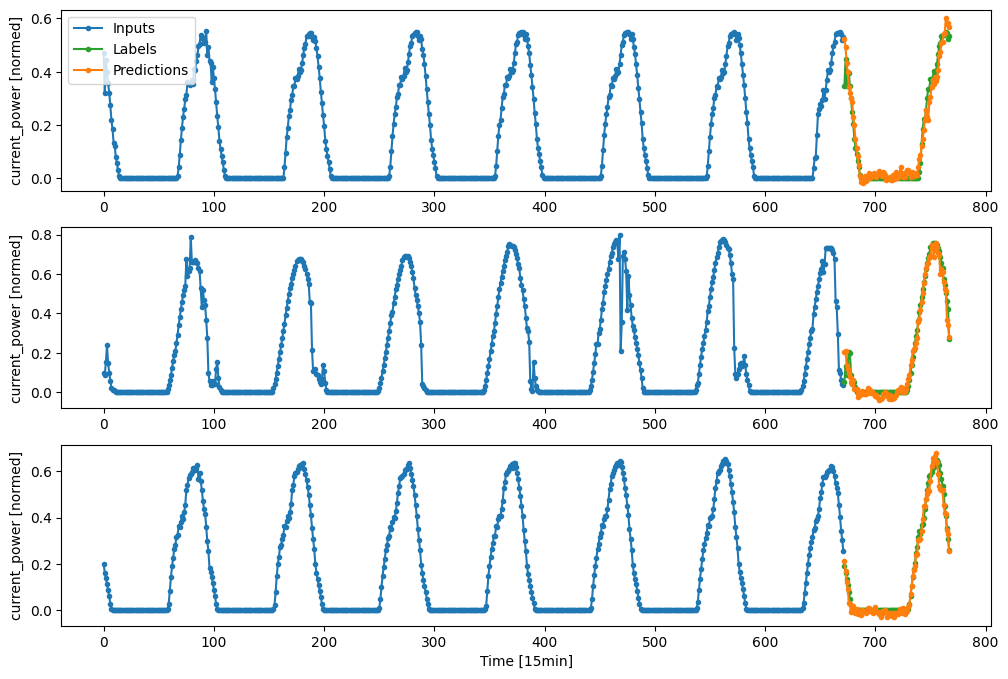

In [49]:
multi_conv_model = load_or_train_model('multi_conv_model', multi_conv_model, multi_window)

IPython.display.clear_output()

v_performance['B-Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
t_performance['B-Conv'] = multi_conv_model.evaluate(multi_window.test, return_dict=True)
multi_window.plot(multi_conv_model)

In [50]:
multi_conv_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 670, 128)       │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 85760)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │     8,233,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 96, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,732,963 (94.35 MB)

 Trainable params: 8,244,320 (31.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,488,643 (62.90 MB)

In [51]:
multi_lstm_model = tf.keras.Sequential([
    # ใช้ RNN + LSTMCell เพื่อหลีกเลี่ยง CudnnRNN
    tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128), return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

841/841 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0452
840/840 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0425


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn (RNN)                       │ (None, 128)            │        80,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2784)           │       359,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 96, 29)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320,099 (5.04 MB)

 Trainable params: 440,032 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 880,067 (3.36 MB)

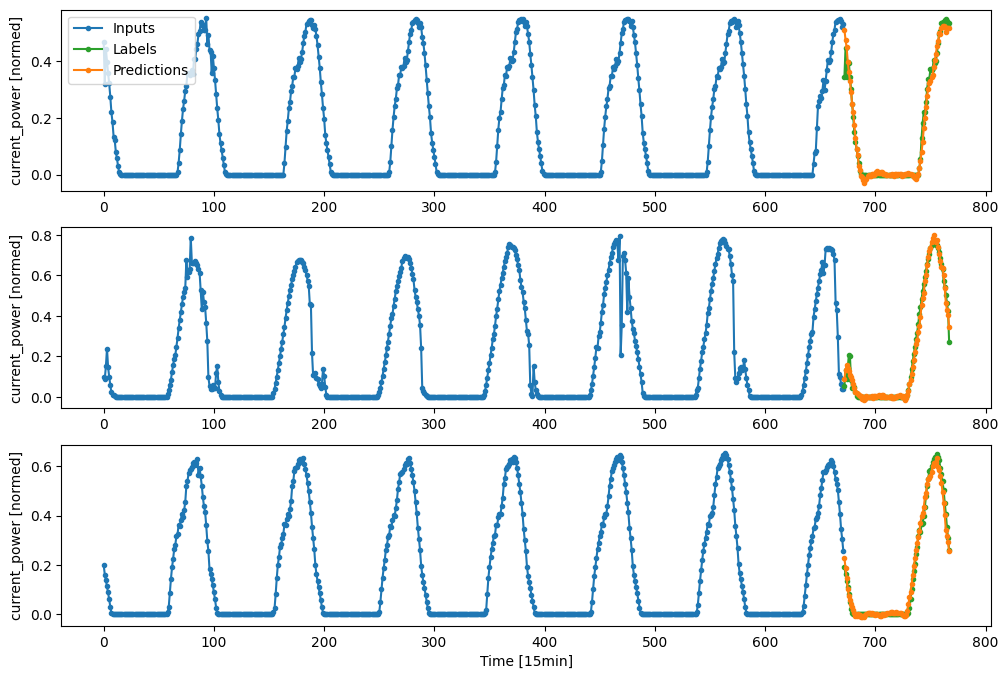

In [52]:
multi_lstm_model = load_or_train_model('multi_lstm_model', multi_lstm_model, multi_window)

IPython.display.clear_output()

v_performance['C-LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
t_performance['C-LSTM'] = multi_lstm_model.evaluate(multi_window.test, return_dict=True)
multi_window.plot(multi_lstm_model)
multi_lstm_model.summary()

In [53]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

  def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

  def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the LSTM state.
    prediction, state = self.warmup(inputs)

    # Insert the first prediction.
    predictions.append(prediction)

    # Run the rest of the prediction steps.
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state, training=training)

        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output.
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

In [54]:
feedback_model = FeedBack(units=128, out_steps=OUT_STEPS)

In [55]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 29])

In [56]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 96, 29)


841/841 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0072 - mean_absolute_error: 0.0433
840/840 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0402


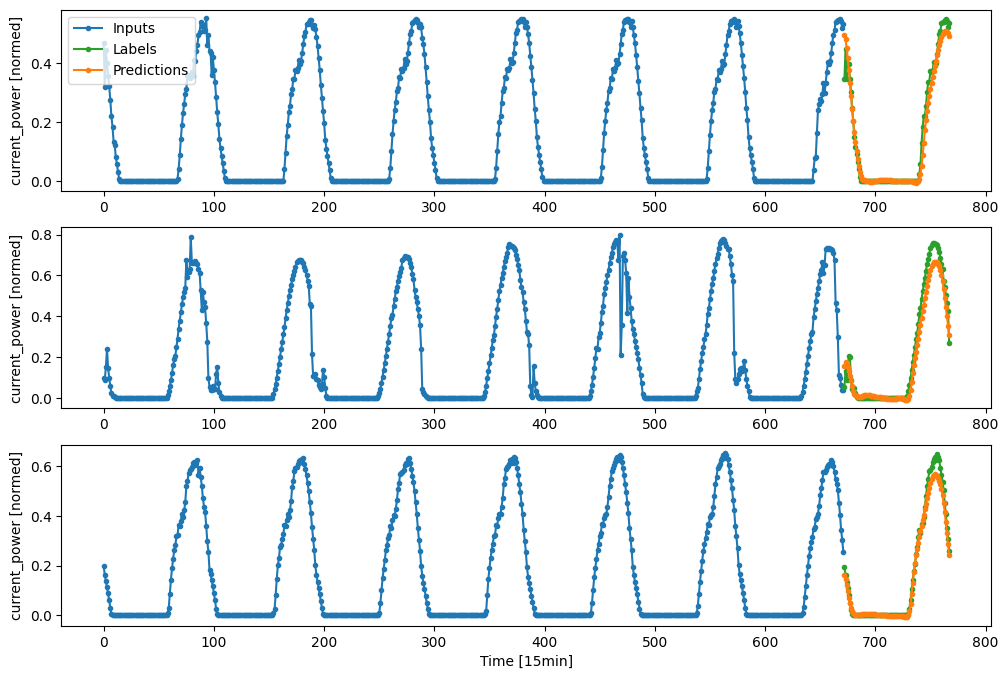

In [57]:
feedback_model = load_or_train_model('feedback_model-128', feedback_model, multi_window, is_custom=True)

IPython.display.clear_output()

v_performance['D-AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
t_performance['D-AR LSTM'] = feedback_model.evaluate(multi_window.test, return_dict=True)
multi_window.plot(feedback_model)

In [58]:
feedback_model.summary()

Model: "feed_back"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_cell_1 (LSTMCell)          │ ?                      │        80,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (RNN)                     │ ((32, 128), (32, 128), │        80,896 │
│                                 │ (32, 128))             │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 29)               │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,914 (991.86 KB)

 Trainable params: 84,637 (330.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,277 (661.24 KB)

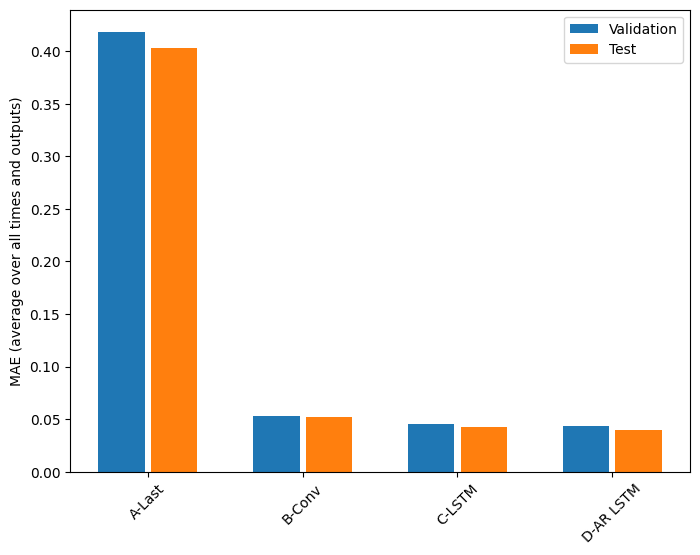

In [62]:
x = np.arange(len(t_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in v_performance.values()]
test_mae = [v[metric_name] for v in t_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=t_performance.keys(), rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [63]:
print('Validation performance:')
for name, value in v_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Validation performance:
A-Last  : 0.4186
B-Conv  : 0.0527
C-LSTM  : 0.0449
D-AR LSTM: 0.0433


In [64]:
print('\nTest performance:')
for name, value in t_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')


Test performance:
A-Last  : 0.4029
B-Conv  : 0.0522
C-LSTM  : 0.0423
D-AR LSTM: 0.0401
